# Análisis de Ferreterías en Mérida, Yucatán

## Estudio de Mercado: Zona Norte-Poniente

Este análisis examina la distribución, características y competitividad de las ferreterías en la zona norte-poniente de Mérida, Yucatán. El estudio incluye:

- Análisis de ratings y número de reseñas
- Presencia digital (sitios web y redes sociales)
- Distribución geográfica y concentración por zonas
- Análisis de saturación y competencia
- Mapas interactivos de visualización

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import re
from geopy.distance import geodesic

import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from folium.plugins import GroupedLayerControl


from funciones import *

sns.set_theme()

In [3]:
df = pd.read_csv('datos_raw.csv', index_col=0)

### Exploracion de los datos

In [4]:
df.head()

,formattedAddress,location,rating,websiteUri,userRatingCount,displayName,primaryType
id,,,,,,,
ChIJoS84RStzVo8RMZAc0ytcFmw,"Perif. de Mérida Lic. Manuel Berzunza S/N, 972...","{'latitude': 20.955513, 'longitude': -89.6999282}",4.2,http://www.surpesa.com.mx/,40.0,"{'text': 'SURPESA Cedis', 'languageCode': 'en'}",hardware_store
ChIJych2UCtzVo8RrIjQgPltzjk,"Perif. de Mérida Lic. Manuel Berzunza, 97312 M...","{'latitude': 20.9555047, 'longitude': -89.699936}",NaN,NaN,NaN,{'text': 'La Tienda del Plomero y el Electrici...,hardware_store
ChIJiVWqvydzVo8RwNMdR4Mi72E,"x75C, C. 34 675, Tixcacal Opichen, Sin Nombre ...","{'latitude': 20.9520469, 'longitude': -89.6897...",4.4,NaN,160.0,"{'text': 'Ferrotlapalería El Farahon Dorado', ...",hardware_store
ChIJX_mhVdhyVo8RBfz5X7rnOpk,"C. 81 511, Ampliación Tixcacal Opichen, 97249 ...","{'latitude': 20.947645899999998, 'longitude': ...",4.6,NaN,253.0,"{'text': 'Tlapalería Vizcarra', 'languageCode'...",hardware_store
ChIJ4dRnBDFzVo8RZ9I0-bg8Dpc,"C. 77ᶜ 598, Ampliación Tixcacal Opichen, 97000...","{'latitude': 20.9491932, 'longitude': -89.6925...",4.9,NaN,12.0,"{'text': 'Ferrotlapalería El Foquito', 'langua...",hardware_store


In [5]:
df.tail()

,formattedAddress,location,rating,websiteUri,userRatingCount,displayName,primaryType
id,,,,,,,
ChIJAQ4vPSMNVo8RT5yOxe-nN3M,"Calle 79 732D X 92 y 94, Almendros, Cd Caucel,...","{'latitude': 20.9922643, 'longitude': -89.7090...",5.0,NaN,4.0,"{'text': 'Ferrotlapaleria ""La Marmota"" Suc Alm...",hardware_store
ChIJGwMKhIB2Vo8RSFFFgFZgbsI,"C. 38 243, Hacienda Sodzil Nte., 97115 Mérida,...","{'latitude': 21.045245299999998, 'longitude': ...",4.9,NaN,23.0,"{'text': 'Ferrotlapalería Angie y Cristhian', ...",hardware_store
ChIJEfy_U1Z1Vo8RzLXG9-q-_Kg,"Perif. de Mérida Lic. Manuel Berzunza 27, Sin ...","{'latitude': 21.0494014, 'longitude': -89.6329...",NaN,https://www.facebook.com/RefacasaManrique,NaN,"{'text': 'Manrique CEDIS', 'languageCode': 'es'}",hardware_store
ChIJKc63ZBN3Vo8R0lEG-qsvigk,"Calle 40 Diagonal, Temozon Norte, 97302 Mérida...","{'latitude': 21.0551119, 'longitude': -89.6156...",4.2,https://fabs.mx/ferreteria-en-temozon/,15.0,"{'text': 'Fabs Ferretería - Temozón', 'languag...",hardware_store
ChIJ982KWAB1Vo8Rr10KSh24Y-E,"Calle 20 & Calle 15, 97302 Xcanatún, Yuc., Mexico","{'latitude': 21.0791922, 'longitude': -89.6279...",NaN,NaN,NaN,"{'text': 'Ferrotlapaleria la 20', 'languageCod...",hardware_store


In [6]:
df.shape

(260, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, ChIJoS84RStzVo8RMZAc0ytcFmw to ChIJ982KWAB1Vo8Rr10KSh24Y-E
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   formattedAddress  260 non-null    object 
 1   location          260 non-null    object 
 2   rating            237 non-null    float64
 3   websiteUri        86 non-null     object 
 4   userRatingCount   237 non-null    float64
 5   displayName       260 non-null    object 
 6   primaryType       249 non-null    object 
dtypes: float64(2), object(5)
memory usage: 16.2+ KB


Duplicados

In [8]:
df.apply(lambda col: col.dropna().duplicated().sum())

formattedAddress      3
location              0
rating              214
websiteUri           21
userRatingCount     135
displayName           8
primaryType         246
dtype: int64

In [9]:
df.duplicated(subset=['formattedAddress', 'displayName'], keep=False).sum()

np.int64(0)

Valores nulos

In [10]:
df.isnull().sum()

formattedAddress      0
location              0
rating               23
websiteUri          174
userRatingCount      23
displayName           0
primaryType          11
dtype: int64

In [11]:
df['userRatingCount'] = df['userRatingCount'].fillna(0)
df['websiteUri'] = df['websiteUri'].fillna('#')

### Formato

In [12]:
df['location'] = df['location'].apply(lambda s: ast.literal_eval(s) if type(s)==str else s)

In [13]:
df['displayName'] = df['displayName'].apply(lambda s: ast.literal_eval(s)['text'] if type(s)==str else s)

In [14]:
df['postalCode'] = df['formattedAddress'].apply(lambda s: re.search(r'\b97\d{3}\b', s).group(0))

In [15]:
hw_stores =  df[:][:]
hw_stores

,formattedAddress,location,rating,websiteUri,userRatingCount,displayName,primaryType,postalCode
id,,,,,,,,
ChIJoS84RStzVo8RMZAc0ytcFmw,"Perif. de Mérida Lic. Manuel Berzunza S/N, 972...","{'latitude': 20.955513, 'longitude': -89.6999282}",4.2,http://www.surpesa.com.mx/,40.0,SURPESA Cedis,hardware_store,97249
ChIJych2UCtzVo8RrIjQgPltzjk,"Perif. de Mérida Lic. Manuel Berzunza, 97312 M...","{'latitude': 20.9555047, 'longitude': -89.699936}",NaN,#,0.0,La Tienda del Plomero y el Electricista,hardware_store,97312
ChIJiVWqvydzVo8RwNMdR4Mi72E,"x75C, C. 34 675, Tixcacal Opichen, Sin Nombre ...","{'latitude': 20.9520469, 'longitude': -89.6897...",4.4,#,160.0,Ferrotlapalería El Farahon Dorado,hardware_store,97249
ChIJX_mhVdhyVo8RBfz5X7rnOpk,"C. 81 511, Ampliación Tixcacal Opichen, 97249 ...","{'latitude': 20.947645899999998, 'longitude': ...",4.6,#,253.0,Tlapalería Vizcarra,hardware_store,97249
ChIJ4dRnBDFzVo8RZ9I0-bg8Dpc,"C. 77ᶜ 598, Ampliación Tixcacal Opichen, 97000...","{'latitude': 20.9491932, 'longitude': -89.6925...",4.9,#,12.0,Ferrotlapalería El Foquito,hardware_store,97000
...,...,...,...,...,...,...,...,...
ChIJAQ4vPSMNVo8RT5yOxe-nN3M,"Calle 79 732D X 92 y 94, Almendros, Cd Caucel,...","{'latitude': 20.9922643, 'longitude': -89.7090...",5.0,#,4.0,"Ferrotlapaleria ""La Marmota"" Suc Almendros",hardware_store,97314
ChIJGwMKhIB2Vo8RSFFFgFZgbsI,"C. 38 243, Hacienda Sodzil Nte., 97115 Mérida,...","{'latitude': 21.045245299999998, 'longitude': ...",4.9,#,23.0,Ferrotlapalería Angie y Cristhian,hardware_store,97115
ChIJEfy_U1Z1Vo8RzLXG9-q-_Kg,"Perif. de Mérida Lic. Manuel Berzunza 27, Sin ...","{'latitude': 21.0494014, 'longitude': -89.6329...",NaN,https://www.facebook.com/RefacasaManrique,0.0,Manrique CEDIS,hardware_store,97302


---

### EDA

#### Distribución de Calificaciones

El siguiente gráfico muestra cómo se distribuyen las calificaciones de las ferreterías en el área de estudio.

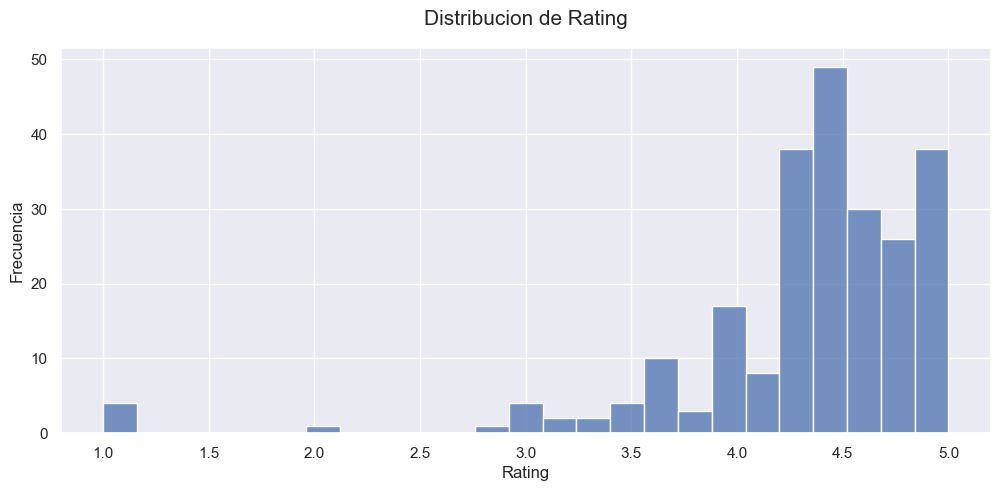

In [16]:
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(data=df['rating'], ax=ax)

ax.set_title('Distribucion de Rating', size=15, pad=17)
ax.set_ylabel('Frecuencia')
ax.set_xlabel('Rating')

plt.show()

#### Relación entre Rating y Volumen de Reseñas

Análisis de cómo se relaciona el número de reseñas con la calificación obtenida, dividido en dos grupos para mejor visualización.

- La mayoría de las ferreterías tienen calificaciones entre 4.0 y 4.5 estrellas
- Pocas ferreterías tienen calificaciones extremadamente bajas (< 3.0)
- La distribución sugiere un nivel de servicio generalmente satisfactorio en el sector

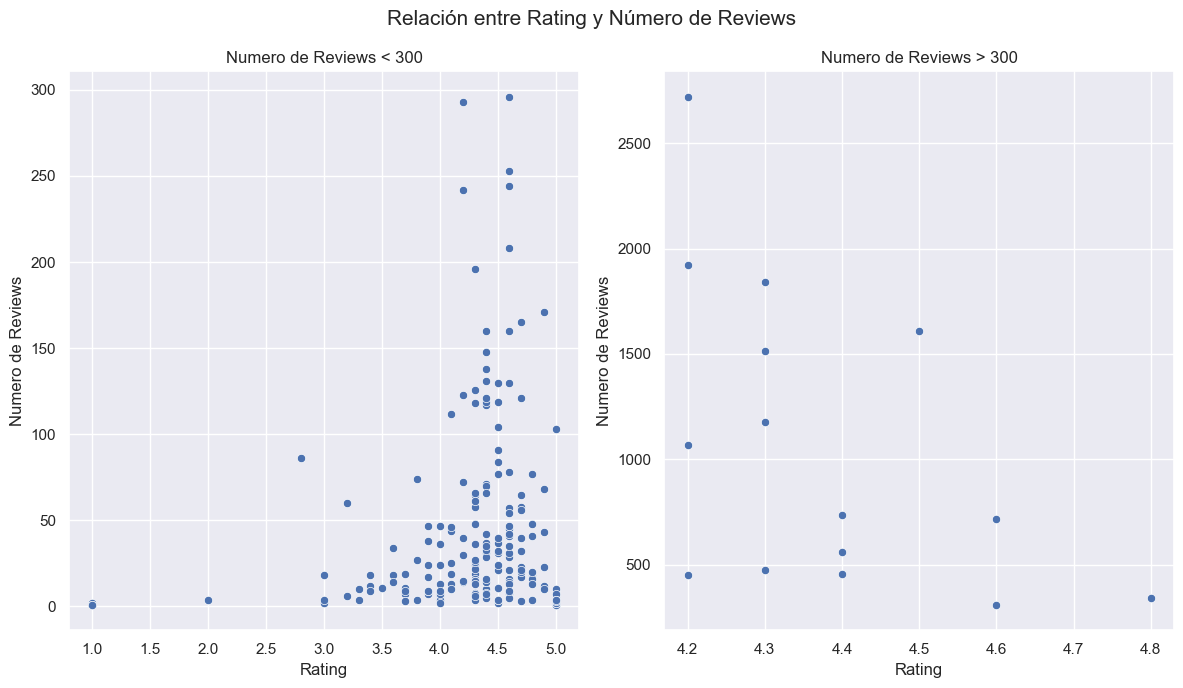

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))

sns.scatterplot(x=df[df['userRatingCount'] <= 300]['rating'], y=df[df['userRatingCount'] <= 300]['userRatingCount'], ax=ax1)
sns.scatterplot(x=df[df['userRatingCount'] >= 300]['rating'], y=df[df['userRatingCount'] >= 300]['userRatingCount'], ax=ax2)

ax1.set_title('Numero de Reviews < 300', size=12)
ax1.set_xlabel('Rating')
ax1.set_ylabel('Numero de Reviews')

ax2.set_title('Numero de Reviews > 300', size=12)
ax2.set_xlabel('Rating')
ax2.set_ylabel('Numero de Reviews')

fig.suptitle('Relación entre Rating y Número de Reviews', size=15)
plt.tight_layout()
plt.show()

- Las ferreterías con mayor número de reseñas (>300) tienden a mantener ratings estables entre 4.0 y 4.5
- Existe mayor dispersión en las calificaciones cuando hay pocas reseñas
- Los negocios consolidados (alto número de reviews) han logrado mantener buena reputación

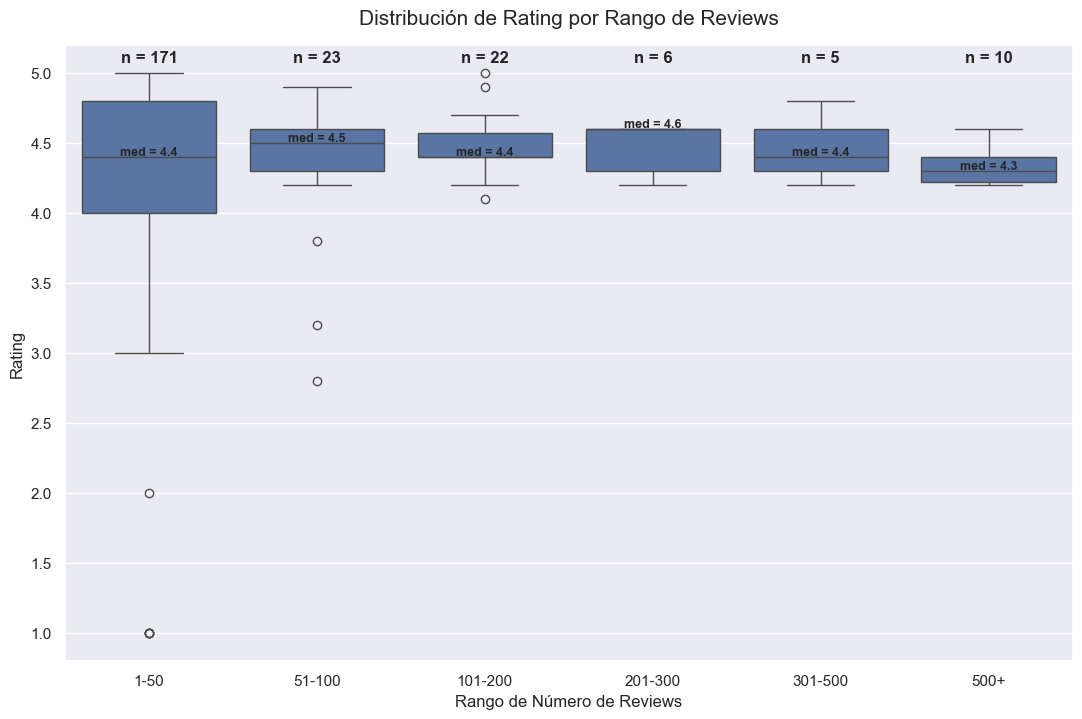

In [18]:
df['rango_reviews'] = pd.cut(df['userRatingCount'],
                             bins=[1, 50, 100, 200, 300, 500, df['userRatingCount'].max()],
                             labels=['1-50', '51-100', '101-200', '201-300', '301-500', '500+'],
                             include_lowest=True)

fig, ax = plt.subplots(figsize=(13,8))

sns.boxplot(data=df, x='rango_reviews', y='rating', ax=ax)

ax.set_title('Distribución de Rating por Rango de Reviews', size=15, pad=15)
ax.set_xlabel('Rango de Número de Reviews', size=12)
ax.set_ylabel('Rating', size=12)

rev_count = df['rango_reviews'].value_counts(sort=False)
rev_rat_mean = df.groupby('rango_reviews', observed=True)['rating'].median()

for xtick in ax.get_xticks():
    ax.text(x=xtick, y=5.075, s=f'n = {rev_count.iloc[xtick]}',
            horizontalalignment='center', fontsize=12, weight='bold')
    ax.text(x=xtick, y=rev_rat_mean.iloc[xtick]+0.015, s=f'med = {rev_rat_mean.iloc[xtick]}',
            horizontalalignment='center', fontsize=9, weight='bold')

plt.show()

---

### Presencia Digital

Análisis de la presencia en línea de las ferreterías (sitios web, redes sociales).

- La mediana del rating se mantiene consistente (~4.3-4.4) en todos los rangos de reseñas
- Los outliers negativos son más comunes en rangos con pocas reseñas
- Las ferreterías con 500+ reseñas demuestran mayor estabilidad en su calificación

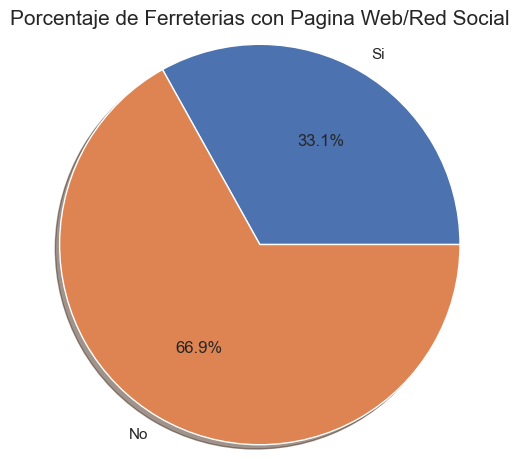

In [19]:
tiene_pagina = len(df[df['websiteUri'] != '#'])
no_tiene_pagina = len(df) - tiene_pagina

fig, ax = plt.subplots(figsize=(15,5))
ax.pie([tiene_pagina, no_tiene_pagina], labels=['Si', 'No'], autopct='%1.1f%%', shadow=True, radius=1.3)
ax.set_title('Porcentaje de Ferreterias con Pagina Web/Red Social', size=15, pad=20)
plt.show()

#### Impacto de la Presencia Digital en las Reseñas

- Una proporción significativa de ferreterías no cuenta con presencia digital
- Existe una oportunidad de diferenciación mediante sitios web o redes sociales
- El sector muestra espacio para modernización digital

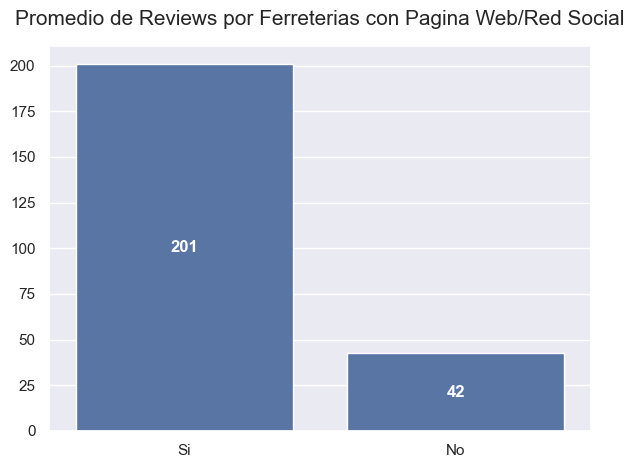

In [20]:
fig, ax = plt.subplots(figsize=(7,5))

sns.barplot(x=['Si', 'No'],
            y=[df[df['websiteUri'] != '#']['userRatingCount'].mean(), df[df['websiteUri'] == '#']['userRatingCount'].mean()])

ax.set_title('Promedio de Reviews por Ferreterias con Pagina Web/Red Social', size=15, pad=15)

for container in ax.containers:
	ax.bar_label(container, fmt='%.0f', label_type='center', weight='bold', color='white')

plt.show()

---

### Ferreterías Destacadas

Identificación de los negocios mejor posicionados en el mercado.

- Las ferreterías con sitio web/redes sociales reciben significativamente más reseñas
- La presencia digital se correlaciona con mayor visibilidad y engagement del cliente
- Tener presencia en línea puede ser un factor clave para atraer más clientes

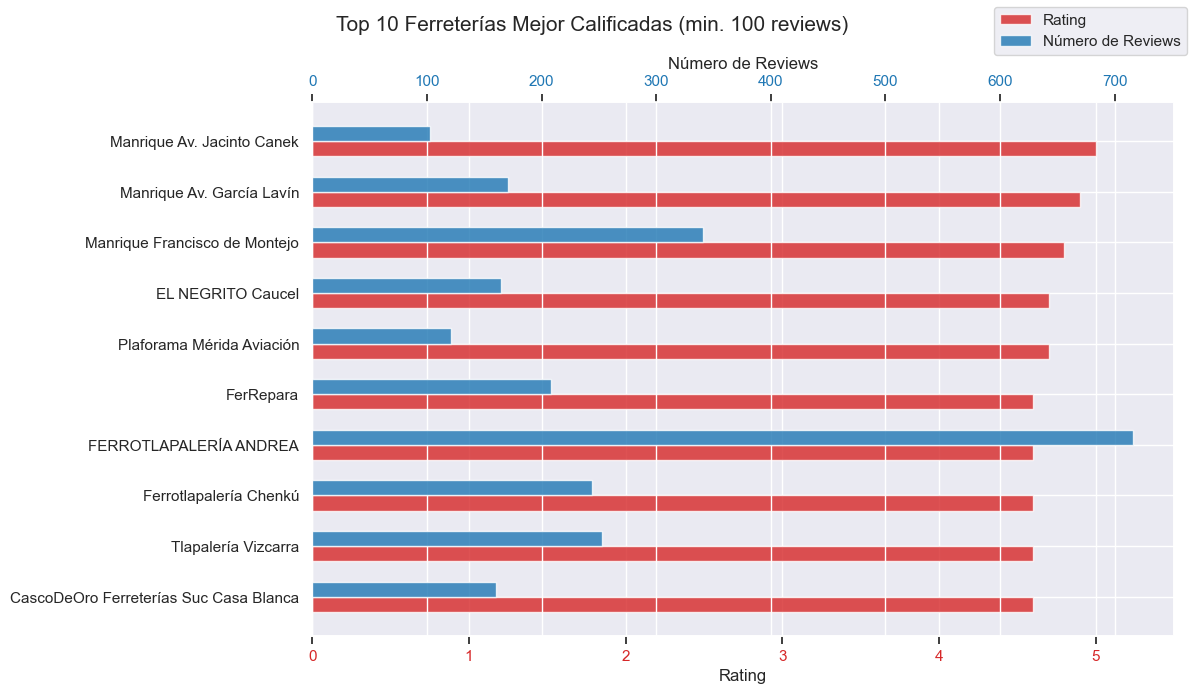

In [21]:
top_ferreterias = df[df['userRatingCount'] >= 100].sort_values('rating', ascending=False).iloc[:10].iloc[::-1]

fig, ax1 = plt.subplots(figsize=(12, 7))
x = np.arange(len(top_ferreterias))
h = 0.3

ax1.barh(y=x - h/2, width=top_ferreterias['rating'], height=h, label='Rating', color='tab:red', alpha=0.8)
ax1.set_xlabel('Rating', fontsize=12)
ax1.set_xlim((0,5.5))
ax1.set_ylabel(None)
ax1.set_yticks(x)
ax1.set_yticklabels(top_ferreterias['displayName'])
ax1.tick_params(axis='x', labelcolor='tab:red')

ax2 = ax1.twiny()
ax2.barh(y=x + h/2, width=top_ferreterias['userRatingCount'], height=h, label='Número de Reviews', color='tab:blue', alpha=0.8)
ax2.set_xlabel('Número de Reviews', fontsize=12)
ax2.tick_params(axis='x', labelcolor='tab:blue')

fig.suptitle('Top 10 Ferreterías Mejor Calificadas (min. 100 reviews)', size=15)
fig.legend()

plt.tight_layout()
plt.show()

---

## Análisis Geográfico

### Preparación de Coordenadas

Extracción de latitud y longitud para visualización en mapas.

- Las ferreterías líderes combinan excelentes ratings (4.5+) con alto volumen de reseñas
- Estos negocios representan el benchmark de calidad en el sector
- La competencia directa debe aspirar a estos estándares de servicio

In [22]:
df['lat'] = [pos['latitude'] for pos in df['location']]
df['lng'] = [pos['longitude'] for pos in df['location']]

### Mapa de Calor: Concentración Geográfica

Visualización de las zonas con mayor densidad de ferreterías en el área de estudio.

In [23]:
m1 = folium.Map(location=[df['lat'].mean(), df['lng'].mean()],min_zoom=12,
               tiles='Cartodb Voyager',
               zoom_control=False)

fg_calor = folium.FeatureGroup(name='Mapa de Calor', show=False)

agregar_titulo(mapa=m1, texto='Mapa de calor: Ferreterias (Oriente-Poniente)')

HeatMap(data=[(col['lat'], col['lng']) for _, col in df.iterrows()],blur=10, radius=12).add_to(m1)
HeatMap(data=[(col['lat'], col['lng']) for _, col in df.iterrows()],blur=10, radius=12).add_to(fg_calor)

m1

### Visualización por Clusters

Agrupación de ferreterías por zonas geográficas cercanas.

- Se identifican claramente zonas de alta concentración de ferreterías
- El mapa de calor revela los corredores comerciales principales
- Útil para identificar áreas saturadas vs. áreas con oportunidad

In [24]:

m2 = folium.Map(location=[df['lat'].mean(), df['lng'].mean()],zoom_start=12, min_zoom=12,
               tiles='Cartodb Voyager',
               zoom_control=False)

fg_cluster = folium.FeatureGroup(name='Ferreterias por Zonas (Clusters)', show=False)

cluster = MarkerCluster()
cluster_capa = MarkerCluster()

for i, col in df.iterrows():
    folium.Marker(location= [col['lat'], col['lng']], tooltip= f'<b>{col['displayName']}</b>').add_to(cluster)
    folium.Marker(location= [col['lat'], col['lng']], tooltip= f'<b>{col['displayName']}</b>').add_to(cluster_capa)

cluster.add_to(m2)
cluster_capa.add_to(fg_cluster)
agregar_titulo(mapa=m2, texto='Ferreterias por Zonas (Cluster)')

m2

---

### Análisis por Código Postal

Identificación de las zonas con mayor número de ferreterías.

- Permite identificar fácilmente cuántas ferreterías hay en cada zona
- Útil para análisis de competencia a nivel micro-regional
- Facilita la planificación de rutas y análisis de cobertura territorial

In [25]:
print('Top 5 Codigos Postales con Mayor Numero de Ferreterias\n')
for i in df['postalCode'].value_counts()[:5].index:
    print(f'\t{i}: {df["postalCode"].value_counts()[i]} Ferreterias\n')

Top 5 Codigos Postales con Mayor Numero de Ferreterias

	97314: 35 Ferreterias

	97246: 27 Ferreterias

	97249: 20 Ferreterias

	97130: 16 Ferreterias

	97302: 13 Ferreterias



---

### Análisis de Competencia y Saturación

#### Distancia al Competidor Más Cercano

Cálculo de la proximidad entre ferreterías para evaluar nivel de competencia.

- Ciertos códigos postales concentran una proporción significativa de ferreterías
- Estas zonas representan los centros comerciales de mayor actividad ferretera
- Importante considerar al evaluar nuevas ubicaciones o expansiones

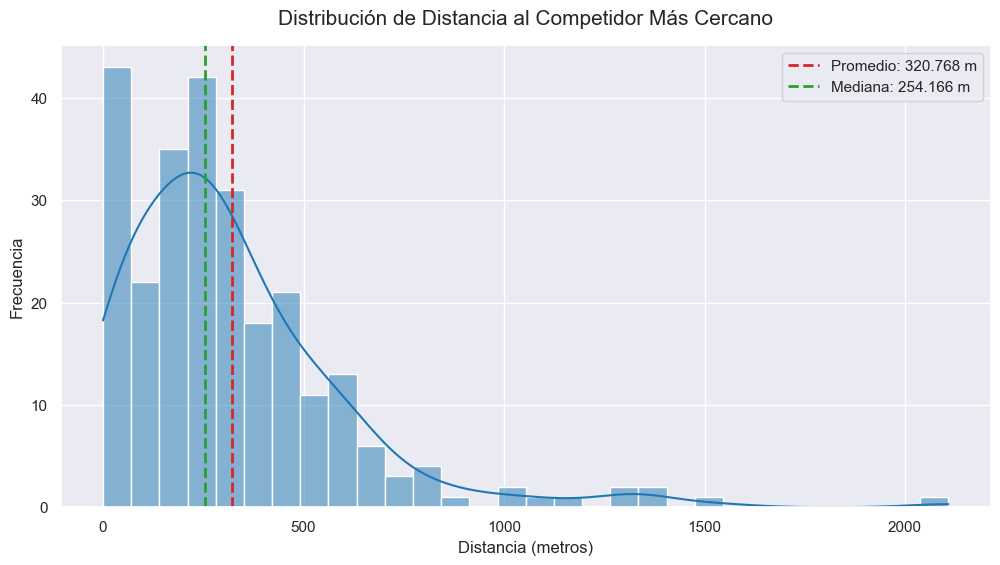

In [26]:
distancias_competidores = []
for i in range(len(df)):
    coord1 = (df['lat'].iloc[i], df['lng'].iloc[i])
    distancias = []
    
    for j in range(len(df)):
        if i != j:
            coord2 = (df['lat'].iloc[j], df['lng'].iloc[j])
            distancias.append(geodesic(coord1, coord2).meters)
            
    distancias_competidores.append(min(distancias))

fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(data=distancias_competidores, bins=30,color='tab:blue', kde=True, ax=ax)

ax.axvline(np.mean(distancias_competidores), color='tab:red', linestyle='--', 
           linewidth=2, label=f"Promedio: {round(np.mean(distancias_competidores), 3)} m")
ax.axvline(np.median(distancias_competidores), color='tab:green', linestyle='--', 
           linewidth=2, label=f"Mediana: {round(np.median(distancias_competidores),3)} m")

ax.set_title('Distribución de Distancia al Competidor Más Cercano', size=15, pad=15)
ax.set_xlabel('Distancia (metros)', size=12)
ax.set_ylabel('Frecuencia', size=12)
ax.legend()

df['comp_dist'] = distancias_competidores

plt.show()

#### Zonas de Mayor Saturación

Identificación de los códigos postales con mayor concentración de ferreterías por área.

- La distancia promedio al competidor más cercano indica el nivel de saturación del mercado
- Zonas con distancias menores representan alta competencia directa
- Este análisis es crucial para decisiones de ubicación de nuevos negocios

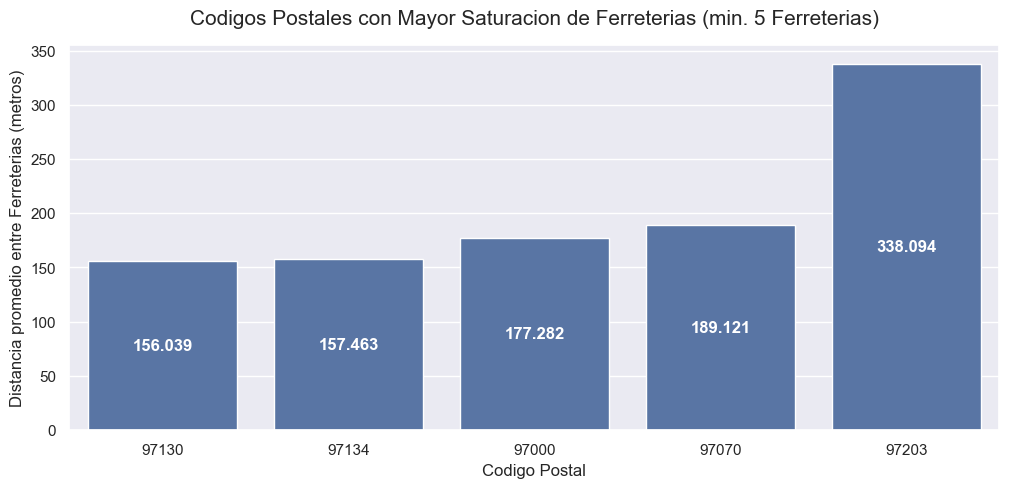

In [27]:
conteo = df['postalCode'].value_counts()

fig, ax = plt.subplots(figsize=(12,5))

sns.barplot(df[df['postalCode'].isin(conteo[conteo >=5].index)].groupby('postalCode')['comp_dist'].mean()[:5].sort_values())

ax.set_xlabel('Codigo Postal')
ax.set_ylabel('Distancia promedio entre Ferreterias (metros)')
ax.set_title('Codigos Postales con Mayor Saturacion de Ferreterias (min. 5 Ferreterias)', size=15, pad=15)

for container in ax.containers:
	ax.bar_label(container, fmt='%.3f', label_type='center', weight='bold', color='white')


plt.show()

---

### Mapas Temáticos

#### Mapa de Rating y Reviews

Visualización que combina calificación (color) y volumen de reseñas (tamaño).

- Los códigos postales con menor distancia promedio entre ferreterías están altamente saturados
- Abrir un negocio en estas zonas implica competencia intensa
- Considerar códigos postales con mayor distancia promedio para menor competencia directa

In [28]:
m3 = folium.Map(location=[df['lat'].mean(), df['lng'].mean()], zoom_start=12,min_zoom=12,
               tiles='Cartodb Voyager',
               zoom_control=False)

fg_reviews = folium.FeatureGroup(name='Rating-Reviews', show=False)

for i, col in df.iterrows():
    folium.CircleMarker(
        location=[col['lat'], col['lng']],
        radius=radio_puntos(col['rango_reviews']),
        tooltip=f"{col['displayName']}: {col['rating']}★ , {int(col['userRatingCount'])} reviews",
        color=color_puntos(col['rating']),
        fill=True,
        fillColor=color_puntos(col['rating']),
        fillOpacity=0.5,
        opacity=0.8).add_to(m3)
    
    fg_reviews.add_child(folium.CircleMarker(
        location=[col['lat'], col['lng']],
        radius=radio_puntos(col['rango_reviews']),
        tooltip=f"{col['displayName']}: {col['rating']}★ , {int(col['userRatingCount'])} reviews",
        color=color_puntos(col['rating']),
        fill=True,
        fillColor=color_puntos(col['rating']),
        fillOpacity=0.5,
        opacity=0.8))

agregar_html(mapa=m3, custom_html=leyenda_html)


agregar_titulo(mapa=m3, texto='Rating-Reviews: Ferreterías (Norte-Poniente)')

m3

#### Mapa Completo con Información Detallada

Mapa interactivo con marcadores que muestran información completa de cada ferretería.

- Permite identificar visualmente las ferreterías mejor posicionadas por zona
- Los marcadores más grandes y verdes representan los negocios líderes
- Útil para análisis competitivo territorial

In [29]:
m4 = folium.Map(location=[df['lat'].mean(), df['lng'].mean()], zoom_start=12,min_zoom=12,
               tiles='Cartodb Voyager',
               zoom_control=False)

fg_marcadores = folium.FeatureGroup(name='Mapa completo', show=True)

for i, col in df.iterrows():
    folium.Marker(
        location= [col['lat'], col['lng']],
        tooltip= f'<b>{col['displayName']}</b>',
        popup=folium.Popup(html=popup_html(col), max_width=1000)).add_to(m4)
    fg_marcadores.add_child(folium.Marker(
        location= [col['lat'], col['lng']],
        tooltip= f'<b>{col['displayName']}</b>',
        popup=folium.Popup(html=popup_html(col), max_width=1000)))


agregar_titulo(mapa=m4, texto='Mapa Completo: Ferreterias (Norte-Poniente)')

m4

---

### Mapa Interactivo Final

Consolidación de todas las capas de visualización en un mapa interactivo completo con opciones de:
- Vista satelital y mapa
- Mapa de calor
- Clusters por zona
- Rating y reviews
- Información detallada por negocio

In [30]:
mapa_interactivo = folium.Map(location=[df['lat'].mean(), df['lng'].mean()],zoom_start=12,min_zoom=12, tiles=None)

tile1 = folium.TileLayer('Esri WorldImagery', name='Satelite').add_to(mapa_interactivo)
tile2 = folium.TileLayer('OpenStreetMap', name='Mapa').add_to(mapa_interactivo)

fg_marcadores.add_to(mapa_interactivo)
fg_calor.add_to(mapa_interactivo)
fg_cluster.add_to(mapa_interactivo)
fg_reviews.add_to(mapa_interactivo)
mapa_interactivo.add_child(BindHTML(fg_reviews, leyenda_html))

folium.LayerControl(collapsed=False).add_to(mapa_interactivo)

GroupedLayerControl(
    groups={'Capas': [fg_marcadores, fg_calor, fg_cluster, fg_reviews]},
    collapsed=False
).add_to(mapa_interactivo)

agregar_titulo(mapa=mapa_interactivo, texto='Mapa Interactivo Ferreterias Merida, Yuc (Norte-Poniente)')

mapa_interactivo.save('index.html')


In [31]:
mapa_interactivo

---

## Conclusiones del Estudio

### Hallazgos Principales:

1. **Calidad del Servicio**: La mayoría de ferreterías mantienen ratings entre 4.0-4.5, indicando un nivel de servicio generalmente satisfactorio.

2. **Presencia Digital**: Existe una clara correlación entre tener sitio web/redes sociales y recibir más reseñas, sugiriendo mayor visibilidad.

3. **Distribución Geográfica**: Se identifican zonas de alta concentración (códigos postales específicos) vs. áreas con menor saturación.

4. **Competencia**: Las distancias promedio entre competidores varían significativamente por zona, identificándose áreas de alta saturación.